## Imports

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
from collections import defaultdict

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [4]:
# Add path to book code
import os
import sys

sys.path.append( os.path.join( '.', 'original', 'code') )

In [5]:
from original.code import nsfg

## Data Source

In [6]:
df_orig = nsfg.ReadFemPreg('original/code/2002FemPreg.dct', 'original/code/2002FemPreg.dat.gz')
print(f'Shape : {df_orig.shape}')
df_orig.head()

Shape : (13593, 244)


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [7]:
# Focus on relevant columns
relevant_cols = ['caseid', 'prglngth', 'outcome', 'pregordr', 'birthord', 'birthwgt_lb', 'birthwgt_oz', 'agepreg', 'finalwgt']
preg = df_orig.loc[:, relevant_cols]  # Not using loc here will lead to SettingWithCopyWarning
                                    # since pandas will not be able to ascertain if df is a view or a copy
print(f'Shape: {preg.shape}')

Shape: (13593, 9)


In [8]:
# Calculate total weight
preg['totalwgt_lb'] = preg.birthwgt_lb + preg.birthwgt_oz / 16.0

In [9]:
# Respondents Data
resp = nsfg.ReadFemResp('original/code/2002FemResp.dct', 
                        'original/code/2002FemResp.dat.gz')

## Analysis

#### Histograms

In [10]:
# Focus on live births
live = preg[preg.outcome == 1].copy()

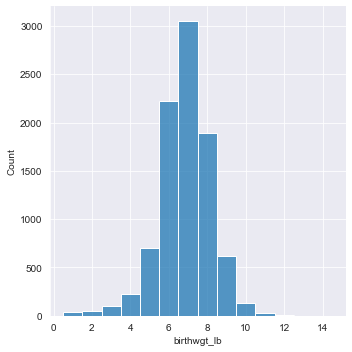

In [11]:
# Histogram of baby weights
sns.displot(live.birthwgt_lb, bins=np.arange(0.5, 15.5, 1));

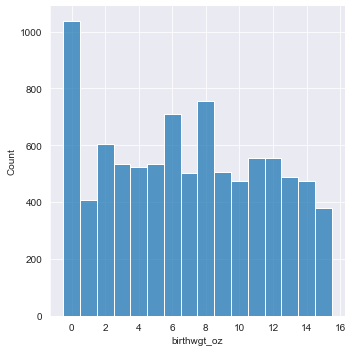

In [12]:
# Histogram of baby weight (oz part)
sns.displot(live.birthwgt_oz, bins=np.arange(-0.5, 16.5, 1));

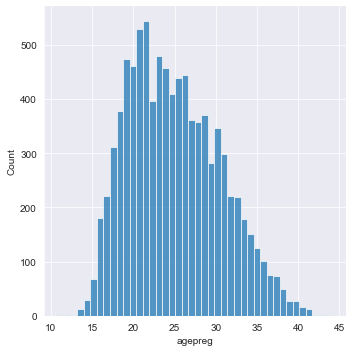

In [13]:
# Mother's age
sns.displot(live.agepreg);

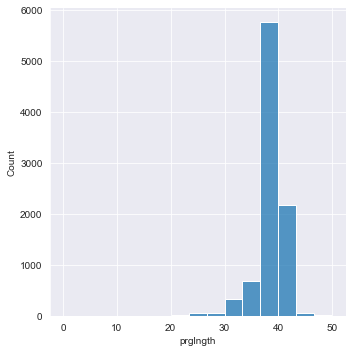

In [14]:
# Pregnancy lengths
sns.displot(live.prglngth);

Q. Do firstborns tend to be early? 

In [15]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

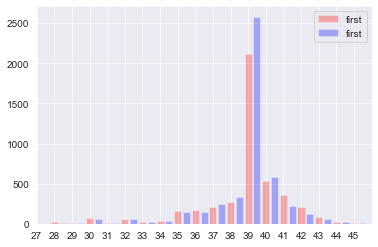

In [16]:
fig, ax = plt.subplots()
ax.hist(firsts.prglngth, label='first', 
             color='r', alpha=0.3,
             rwidth = 0.4, bins=np.arange(0.5, 50.5, 1),
             align='mid')

ax.hist(others.prglngth, label='first', 
             color='b', alpha=0.3,
             rwidth = 0.4, bins=np.arange(0.5, 50.5, 1),
             align='right')


plt.xlim([27, 46])
plt.xticks(np.arange(27, 46))
plt.legend();

#### Summarizing Distributions

Descriptive Statistics 
* Central Tendency
* Modes
* Spread
* Tails
* Outliers

In [17]:
print(f'Mean : {live.prglngth.mean():.2f} weeks')
print(f'Var : {live.prglngth.var():.2f}')
print(f'Std : {live.prglngth.std():.2f} weeks')

Mean : 38.56 weeks
Var : 7.30
Std : 2.70 weeks


#### Effect Size

In [18]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1*var1 + n2*var2)/(n1+n2)
    effect_size = diff/math.sqrt(pooled_var)
    return effect_size
 
print(f'Cohen Effect Size (Pregnancy Length): {CohenEffectSize(firsts.prglngth, others.prglngth):.4f}')

Cohen Effect Size (Pregnancy Length): 0.0289


# Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [19]:
print(f'Mean weight for firstborns : {firsts.totalwgt_lb.mean():.2f} lbs')
print(f'Mean weight for others : {others.totalwgt_lb.mean():.2f} lbs')

Mean weight for firstborns : 7.20 lbs
Mean weight for others : 7.33 lbs


In [20]:
print(f'Cohen Effect Size: {CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb):.3f}')

Cohen Effect Size: -0.089


Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

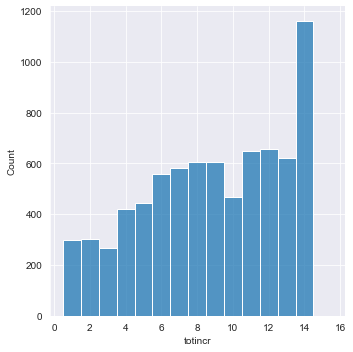

In [21]:
sns.displot(resp.totincr, bins=np.arange(0.5, 16.5));

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

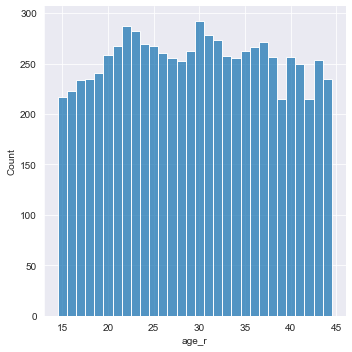

In [22]:
sns.displot(resp.age_r, bins=np.arange(14.5, 45.5));

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

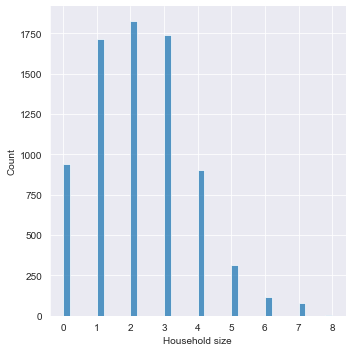

In [23]:
g = sns.displot(resp.numfmhh)
g.set_axis_labels('Household size');

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

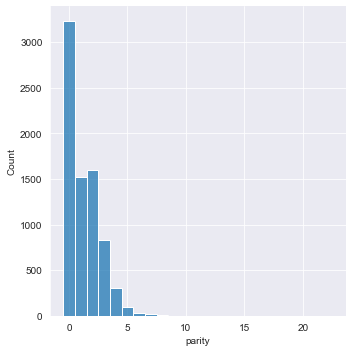

In [24]:
sns.displot(resp.parity, bins=np.arange(-0.5, 23.5 ));

In [25]:
# See actual counts and maximum
resp.parity.value_counts().sort_index()

0     3230
1     1519
2     1603
3      828
4      309
5       95
6       29
7       15
8        8
9        2
10       3
16       1
22       1
Name: parity, dtype: int64

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

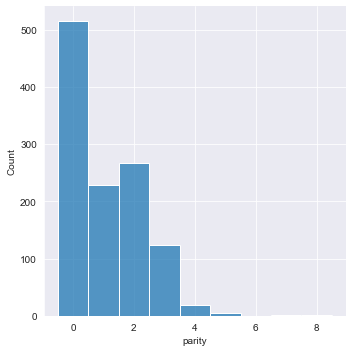

In [26]:
highest_income = (resp.totincr == 14)
sns.displot(resp.parity[highest_income],
           bins = np.arange(-0.5, 9.5));

Find the largest parities for high income respondents.

In [27]:
print('Maximum parity for highest income : '
      f'{resp.parity[highest_income].max()}')

Maximum parity for highest income : 8


Compare the mean <tt>parity</tt> for high income respondents and others.

In [28]:
print('Mean parity')
print(f'Highest Income : {resp.parity[highest_income].mean():.2f}')
print(f'Others : {resp.parity[~highest_income].mean():.2f}')

Mean parity
Highest Income : 1.08
Others : 1.25


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [29]:
parity_cohen_effect = CohenEffectSize(resp.parity[highest_income],
                                      resp.parity[~highest_income])
print(f'Cohen Size Effect (Parity): {parity_cohen_effect:.2f}')


Cohen Size Effect (Parity): -0.13
